In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [80]:
house = pd.read_parquet('./data/clean_house.parquet')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,47.5112,-122.257,1340,5650,10,7,0,0.0,60.0,3.00
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,47.7210,-122.319,1690,7639,12,7,0,1.0,24.0,6.75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,47.7379,-122.233,2720,8062,2,6,0,0.0,82.0,2.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,47.5208,-122.393,1360,5000,12,7,0,0.0,50.0,12.00
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,47.6168,-122.045,1800,7503,2,8,0,0.0,28.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,47.6993,-122.346,1530,1509,5,8,0,0.0,6.0,7.50
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,47.5107,-122.362,1830,7200,2,8,0,0.0,1.0,10.00
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,47.5944,-122.299,1020,2007,6,7,0,0.0,6.0,1.50
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,47.5345,-122.069,1410,1287,1,8,0,0.0,11.0,7.50


In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
from sklearn.compose import make_column_transformer

In [82]:
y = house.price

In [83]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'grade_value',
       'has_view', 'renovated', 'yr_since_renovate', 'total_rooms'],
      dtype='object')

#### No transformations or OHE 

In [84]:
# R2 = .4931
base = ['sqft_living']
y = house.price

In [85]:
# R2 = .5623
simple = ['sqft_living','waterfront','grade_value']
y = house.price

In [86]:
# R2 = .6493
many = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated','sqft_living15','sqft_lot15','month','grade_value','renovated','yr_since_renovate','total_rooms']
y = house.price

In [144]:
# R2 = .7017
coef_all = house.drop(['id','date','grade','price','sqft_above','sqft_basement','has_view','total_rooms','yr_since_renovate','yr_renovated','lat','long'],axis=1)
colsx = list(coef_all.columns)
y = house.price

### Transformationed Price without OHE

In [88]:
# R2 = .4494
base_trans = ['sqft_living']
y = np.log(house.price)

In [89]:
# R2 = .5531
simple_trans = ['sqft_living','waterfront','grade_value']
y = np.log(house.price)

In [90]:
# R2 = .6403
many_trans = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated','sqft_living15','sqft_lot15','month','grade_value','renovated','yr_since_renovate','total_rooms']
y = np.log(house.price)

In [91]:
# R2 = .7667
all_trans = house.drop(['id','date','grade','price'],axis=1)
tpcolsx = list(all_trans.columns)
y = np.log(house.price)

### Transformation Price with OHE 

In [92]:
# R2 = .8232
ohe_base = ['zipcode','sqft_living']
y = np.log(house.price)

### Log Transformation Price and sqft_living with OHE

In [93]:
# R2 = .8524
ohe_simple = ['zipcode','sqft_living','grade_value','waterfront']
y = np.log(house.price)

In [94]:
# R2 = .8527
trainlight = ['zipcode','sqft_living','grade_value','waterfront']

In [95]:
# R2 = .8620
trainlight2 = ['zipcode','sqft_living','grade_value','waterfront','view']

In [96]:
# R2 = .8621 - bathrooms didn't change R2 at all
trainmedium = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms']

In [97]:
# R2 = .8662
trainmedium2 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition']

In [98]:
# R2 = .8669
trainmedium3 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate']

In [99]:
# R2 = .8732
trainheavy = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot']

In [100]:
# R2 = .8748
trainheavy2 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15']

In [101]:
# R2 = .8773
trainheavy3 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15', 'sqft_above']

In [102]:
# R2 = .8784
trainheavy4 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15', 'sqft_above','total_rooms']

### Log Transformation on All except sqft_above

In [ ]:
# R2 = .8827
trainall = house.drop(['id','date','grade','price'],axis=1)
tcolsx = list(trainall.columns)

### Final Model!! Log Transformed on Price and sqfts with OHE

In [197]:
# R2 = .8782
trainmost = house.drop(['id','date','grade','price','sqft_above','sqft_basement','has_view','total_rooms','yr_since_renovate','yr_renovated','lat','long','bedrooms'],axis=1)
tcol = list(trainmost.columns)
y = np.log(house.price)

In [198]:
tcol

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_built',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'grade_value',
 'renovated']

In [193]:
X = house[tcol]

In [194]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.33, random_state = 42)

In [196]:
ohe = sk.OneHotEncoder()
transformed_train = ohe.fit_transform(X_train[['zipcode']])
X_train[ohe.categories_[0]] = transformed_train.toarray()

transformed_test = ohe.fit_transform(X_test[['zipcode']])
X_test[ohe.categories_[0]] = transformed_test.toarray()

transformed_x = ohe.fit_transform(X[['zipcode']])
X[ohe.categories_[0]] = transformed_x.toarray()

X_train.drop(['zipcode',98103],axis=1)
X_test.drop(['zipcode',98103],axis=1)
X.drop(['zipcode',98103],axis=1)

X_train['sqft_living'] = np.log(X_train.sqft_living)
X_test['sqft_living'] = np.log(X_test.sqft_living)
X['sqft_living'] = np.log(X.sqft_living)

X_train['sqft_living15'] = np.log(X_train.sqft_living15)
X_test['sqft_living15'] = np.log(X_test.sqft_living15)
X['sqft_living15'] = np.log(X.sqft_living15)

# X_train['sqft_lot'] = np.log(X_train.sqft_lot)
# X_test['sqft_lot'] = np.log(X_test.sqft_lot)
# X['sqft_lot'] = np.log(X.sqft_lot)

X_train['sqft_lot15'] = np.log(X_train.sqft_lot15)
X_test['sqft_lot15'] = np.log(X_test.sqft_lot15)
X['sqft_lot15'] = np.log(X.sqft_lot15)

# X_train['sqft_above'] = np.log(X_train.sqft_above)
# X_test['sqft_above'] = np.log(X_test.sqft_above)
# X['sqft_above'] = np.log(X.sqft_above)

# X_train['sqft_basement'] = np.log(1 + X_train.sqft_basement)
# X_test['sqft_basement'] = np.log(1 + X_test.sqft_basement)
# X['sqft_basement'] = np.log(1 + X.sqft_basement)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions_all = model.predict(X)
r2_test = r2_score(y_test, predictions)
r2_train = r2_score(y_train, model.predict(X_train))
#rmse = mean_squared_error(y_test, predictions, squared=False)
print('Test R2: ',r2_test, 
      '\nTrain R2:',r2_train)

Test R2:  0.8746986333215192 
Train R2: 0.8794597548711925


C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [109]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,7.073270,5650,1.0,0,0.0,3,1955,98178,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7.851661,7242,2.0,0,0.0,3,1951,98125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,6.646391,10000,1.0,0,0.0,3,1933,98028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,7.580700,5000,1.0,0,0.0,5,1965,98136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,7.426549,8080,1.0,0,0.0,3,1987,98074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,7.333023,1131,3.0,0,0.0,3,2009,98103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,7.745003,5813,2.0,0,0.0,3,2014,98146,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,6.927558,1350,2.0,0,0.0,3,2009,98144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,7.377759,2388,2.0,0,0.0,3,2004,98027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
predictions_all

array([12.32053538, 13.1765752 , 12.52282668, ..., 12.68481098,
       12.95228279, 12.6659674 ])

In [111]:
pred = pd.DataFrame(predictions)
pred_all = pd.DataFrame(predictions_all)

In [112]:
actual = pd.DataFrame(y_test)
actual_all = pd.DataFrame(y)

pred.index = actual.index
pred_all.index = actual_all.index

In [113]:
preds_df = pd.concat([pred,actual],axis=1)
preds_df['residual'] = preds_df[0] - preds_df['price']

In [114]:
preds_df

,0,price,residual
3686,12.207077,11.794338,0.412739
10247,13.047796,12.936034,0.111762
4037,12.839081,13.110291,-0.271210
3437,12.641839,12.779873,-0.138034
19291,13.165233,13.314635,-0.149403
...,...,...,...
19490,13.057767,13.244581,-0.186814
17526,12.969555,13.011432,-0.041876
5761,12.621726,12.721886,-0.100159
18907,13.068100,12.923912,0.144188


In [115]:
preds_df_all = pd.concat([pred_all,actual_all],axis=1)
preds_df_all['residual'] = preds_df_all['price'] - preds_df_all[0]
preds_df_all.max()

0           15.589763
price       15.856731
residual     0.976582
dtype: float64

In [116]:
preds_df_all['residual_abs'] = preds_df_all.residual.abs()

In [117]:
preds_df_all.describe()

,0,price,residual,residual_abs
count,21596.000000,21596.000000,21596.000000,21596.000000
mean,13.048489,13.048196,-0.000293,0.134691
std,0.492732,0.526562,0.183058,0.123967
min,11.620095,11.264464,-1.271253,0.000008
25%,12.688104,12.682307,-0.100209,0.046001
50%,13.029407,13.017003,0.002637,0.101874
75%,13.354262,13.377006,0.103274,0.185425
max,15.589763,15.856731,0.976582,1.271253


In [118]:
two_std_above = preds_df_all.residual.mean()+(preds_df_all.residual.std()*2)
two_std_below = preds_df_all.residual.mean()-(preds_df_all.residual.std()*2)

In [119]:
undervalued_res = preds_df_all[preds_df_all.residual >= two_std_above]
undervalued = X[X.index.isin(undervalued_res.index)]

overvalued_res = preds_df_all[preds_df_all.residual <= two_std_below]
overvalued = X[X.index.isin(overvalued_res.index)]
overvalued

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
2,2,1.00,6.646391,10000,1.0,0,0.0,3,1933,98028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3,1.00,7.484369,7470,1.0,0,0.0,3,1960,98146,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,5,2.50,8.055158,9134,1.0,0,0.0,4,1966,98056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,3,2.75,7.926603,3809,1.5,0,0.0,5,1925,98144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,2,2.25,7.383989,2040,2.0,0,0.0,4,1979,98056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21277,2,2.50,7.358831,1268,3.0,0,0.0,3,2007,98106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21356,5,3.50,8.402904,2975,3.0,0,2.0,3,2015,98119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21420,3,2.50,7.845808,5720,2.0,0,0.0,3,2006,98031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21427,1,1.50,7.073270,1688,2.0,0,0.0,3,2007,98126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
overvalued.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,615.000000,615.000000,615.000000,6.150000e+02,615.000000,615.000000,615.000000,615.000000,615.00000,615.000000,...,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,3.082927,1.832927,7.378699,2.547641e+04,1.349593,0.024390,0.317073,3.242276,1957.99187,98092.032520,...,0.052033,0.008130,0.019512,0.024390,0.035772,0.004878,0.016260,0.013008,0.026016,0.009756
std,1.051423,0.912406,0.471912,9.934318e+04,0.511811,0.154383,0.935345,0.706993,27.99741,56.927054,...,0.222273,0.089873,0.138429,0.154383,0.185873,0.069729,0.126577,0.113401,0.159313,0.098370
min,1.000000,0.500000,6.063785,7.470000e+02,1.000000,0.000000,0.000000,1.000000,1900.00000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,7.071147,5.176000e+03,1.000000,0.000000,0.000000,3.000000,1942.00000,98038.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.750000,7.358831,8.000000e+03,1.000000,0.000000,0.000000,3.000000,1957.00000,98106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,7.673223,1.161200e+04,2.000000,0.000000,0.000000,4.000000,1978.00000,98133.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,8.000000,9.513404,1.164794e+06,3.000000,1.000000,4.000000,5.000000,2015.00000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,3.371828,2.115843,7.550728,1.509983e+04,1.494119,0.006761,0.233377,3.409752,1971.000787,98077.950685,...,0.013336,0.002639,0.020652,0.011761,0.012456,0.011808,0.012132,0.006297,0.012965,0.014679
std,0.904114,0.768998,0.424199,4.141355e+04,0.539685,0.081946,0.765116,0.650471,29.375460,53.514040,...,0.114711,0.051308,0.142220,0.107813,0.110912,0.108022,0.109477,0.079108,0.113128,0.120266
min,1.000000,0.500000,5.913503,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,7.265430,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,98033.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,7.554859,7.619000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,98065.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,7.843849,1.068550e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,98118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,8.000000,9.513404,1.651359e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
pd.DataFrame((overvalued.mean()-X.mean())/overvalued.mean()).sort_values(by=0,ascending=False).head(20)

,0
98146,0.743703
waterfront,0.722819
98118,0.699206
98148,0.675357
98070,0.666813
98168,0.651798
98014,0.646879
98106,0.566365
98055,0.523002
98166,0.517781


In [123]:
pd.DataFrame((undervalued.mean()-X.mean())/undervalued.mean()).sort_values(by=0,ascending=False).head(20)


,0
98010,0.799731
98118,0.751340
98146,0.670415
98014,0.668889
waterfront,0.649129
98122,0.612814
98112,0.569022
98033,0.548612
view,0.530533
98024,0.519355


<AxesSubplot:xlabel='residual', ylabel='Count'>

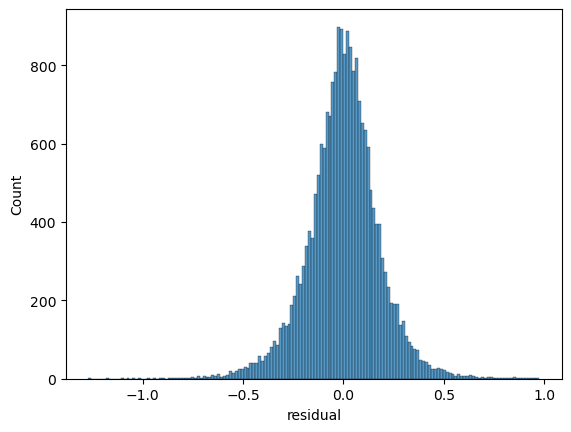

In [124]:
sns.histplot(preds_df_all.residual)

In [125]:
preds_df_all.sort_values('residual',ascending=False)

,0,price,residual,residual_abs
700,12.609515,13.586097,0.976582,0.976582
19668,13.645563,14.608503,0.962940,0.962940
9554,12.426178,13.384728,0.958550,0.958550
4014,12.582586,13.540547,0.957962,0.957962
8597,12.231184,13.186371,0.955186,0.955186
...,...,...,...,...
21356,14.198297,13.102161,-1.096136,1.096136
12539,12.577974,11.407565,-1.170409,1.170409
1624,13.297055,12.039528,-1.257527,1.257527
18318,13.035322,11.775290,-1.260032,1.260032


In [126]:
preds_df_all

,0,price,residual,residual_abs
0,12.320535,12.309982,-0.010553,0.010553
1,13.176575,13.195614,0.019039,0.019039
2,12.522827,12.100712,-0.422115,0.422115
3,13.177434,13.311329,0.133896,0.133896
4,13.085244,13.142166,0.056922,0.056922
...,...,...,...,...
21592,13.215551,12.793859,-0.421692,0.421692
21593,12.934846,12.899220,-0.035626,0.035626
21594,12.684811,12.904459,0.219648,0.219648
21595,12.952283,12.899220,-0.053063,0.053063


C:\Users\capta\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "None of [Index([(12.320535376667976, 13.176575204357505, 12.522826676256955, 13.177433819510043, 13.085243940353394, 14.211621953174472, 12.477780922316015, 12.29130366910249, 12.732307805679739, 12.693195335566998, 13.540243565104902, 13.062387424521148, 12.818765735253692, 12.856026701629162, 13.254171755164862, 13.625825135037303, 12.76890510134399, 13.214300119318068, 12.231549152173102, 12.293176569975913, 12.858961135149002, 14.16300445329398, 12.656984461471438, 12.215081469155848, 12.780194447375834, 12.305605528876185, 13.626980626955628, 13.553023139946163, 13.147887513041496, 13.368462588638067, 13.168945310637355, 12.609045359306037, 13.347185076214373, 13.13066042587161, 12.648498499765992, 13.523230812512338, 12.774757764302194, 13.523075980134308, 12.17239618115127, 13.076128067448735, 13.377002792432904, 13.23797116894275, 13.612342407926917, 13.27350934036076, 12.325613653287292, 13.177576585672796, 11.986506612040102, 13.506683084182441, 13.03599370084703, 14.03955262620002, 12.352947761304677, 13.181419003754854, 13.111484642140567, 13.248558924533427, 13.727757922373712, 13.733444957062602, 12.60822125338018, 12.816276795230806, 13.791342087090015, 12.980126733891666, 13.220073878765106, 12.42050985340029, 13.112538238056004, 13.161843394860625, 13.126626593060791, 13.34481133427471, 14.07462963834405, 12.53282897733152, 12.194155426695943, 13.993609027937055, 14.16794718336314, 12.89274580962956, 13.253407625481486, 12.855365419760346, 12.676843743771315, 13.766141978092492, 13.020339970476925, 12.823270895518363, 12.741162652149796, 13.413106181658804, 12.83738933969289, 12.59857120551169, 12.911399319767952, 12.904103820212185, 12.597679633647203, 13.665087098255754, 12.64902597758919, 13.17184032779187, 12.804014571011066, 12.73397909104824, 12.455531445331872, 13.931984824128449, 12.196677670814097, 13.262863531708717, 13.238558852113783, 13.634762316942215, 12.476163860410452, 12.153524450957775, 12.724986985325813, 13.305716749280691, ...), (12.309982108920686, 13.195613839143922, 12.100712129872347, 13.311329476916953, 13.142166004700508, 14.0225247273486, 12.458774999085929, 12.583995250631936, 12.343658308482738, 12.685407602204794, 13.403775836842515, 13.056223574899784, 12.644327576461329, 12.89921982609012, 13.180632285528304, 13.38472764187182, 12.886641043883259, 13.091904169919621, 12.14950229404178, 12.345834587905333, 12.86099861326992, 14.508657738524219, 12.560244459250788, 12.439958293376286, 12.70381302974751, 12.358793732547838, 13.750438561220559, 13.410545324897761, 12.989974189358584, 13.485616636703183, 13.271645080120082, 12.542544882151386, 13.440817108522863, 13.190022025878143, 12.683858415217964, 13.453104939316557, 13.217673557208654, 13.369223455335854, 12.388394202324129, 13.312983737012978, 13.345506928718539, 13.560618308335483, 13.666998948650464, 13.437174117244362, 12.641096555879882, 13.098070684835283, 12.257193425037888, 13.573438996764546, 13.017002861746503, 14.115615150414612, 12.337100907936577, 12.751299696013497, 13.304684934198283, 13.279367126213993, 13.732128949025222, 13.693342923990066, 12.58621994565405, 12.614865543731012, 13.765269341527528, 12.971540487669746, 13.38472764187182, 12.57418196709457, 13.132313708257497, 13.215853720491667, 12.959844447906553, 12.668626720622465, 13.790192749979985, 12.567237494741757, 12.225875272826354, 14.100689500197937, 13.854731271117556, 12.691580461311874, 13.255144488638146, 12.793859310432293, 12.762827201184564, 13.632188500836737, 12.84792653170257, 13.081541382884074, 12.92391243868049, 13.487006490992238, 12.873902018105829, 12.793859310432293, 12.779873068457553, 12.782686009834167, 12.66032791780777, 13.753635154246187, 12.628067055589549, 13.041153321978786, 12.2783933071098, 12.721885810807203, 12.402872221504781, 13.9108207377686, 11.938193200374572, 12.971540487669746, 13.458835614025542, 13.715690222682063, 12.419165860990882, 12.201060103706629, 12.65714826489039, 12.988831984779805, ...)], dtype='object')] are in the [columns]"

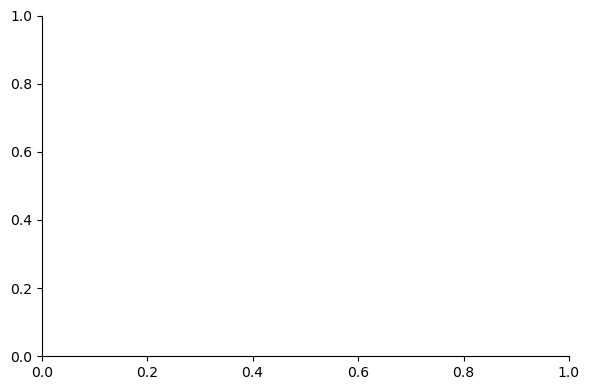

In [167]:
x = preds_df_all[0]
y = preds_df_all.price
p = sns.FacetGrid(data = preds_df_all,size = 4, aspect = 1.5) 
p.map(plt.scatter, x, y, color = 'black')
p.map(seaborn.regplot, x, y, scatter = False, ci = 95, 
    fit_reg = True, color = 'blue') 
p.map(seaborn.regplot, x, y, scatter = False, ci = 0, 
    fit_reg = True, color = 'red')

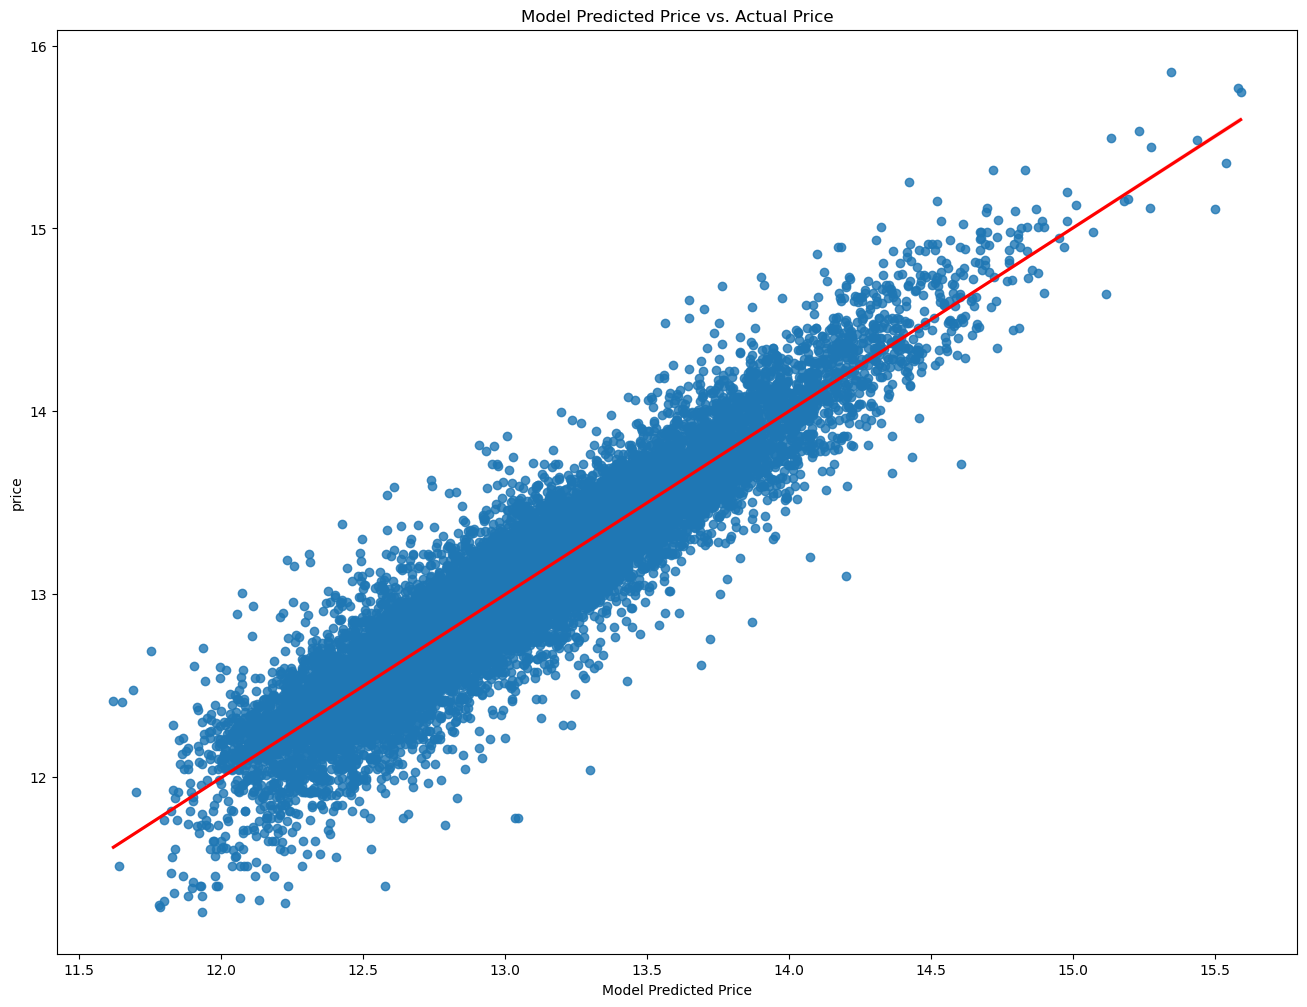

In [161]:
plt.figure(figsize=(16,12))
sns.regplot(x=preds_df_all[0],y=preds_df_all['price'],line_kws={"color": "red"})
plt.xlabel('Model Predicted Price')
plt.title('Model Predicted Price vs. Actual Price');

In [128]:
preds_df['residual'] = preds_df['residual'].apply(lambda x: abs(x))
preds_df = preds_df.sort_values(by = 'residual', ascending = False)
X_test[X_test.index.isin(preds_df.index)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
3686,3,0.75,6.745236,8573,1.0,0,0.0,3,1945,98146,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10247,3,1.00,7.319865,6083,1.0,0,0.0,4,1940,98115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4037,4,2.25,7.489971,42000,1.0,0,0.0,3,1983,98045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3437,2,1.50,7.038784,2500,1.0,0,1.0,3,1988,98106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19291,3,1.00,7.313220,3920,1.0,0,0.0,3,1947,98107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19490,4,2.50,7.870930,10016,2.0,0,0.0,3,1996,98056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17526,4,2.00,7.478735,3332,2.0,0,0.0,3,1924,98118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5761,4,2.25,7.731931,7500,1.0,0,0.0,4,1963,98198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18907,3,1.75,7.473069,3520,1.0,0,0.0,3,1966,98144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
print(pred, actual)

               0
3686   12.207077
10247  13.047796
4037   12.839081
3437   12.641839
19291  13.165233
...          ...
19490  13.057767
17526  12.969555
5761   12.621726
18907  13.068100
12348  13.257642

[7127 rows x 1 columns]            price
3686   11.794338
10247  12.936034
4037   13.110291
3437   12.779873
19291  13.314635
...          ...
19490  13.244581
17526  13.011432
5761   12.721886
18907  12.923912
12348  13.099095

[7127 rows x 1 columns]


In [130]:
diff = y_test - predictions

### Multiple One Hot Encodes

In [131]:
# ohe.fit(X_train[['zipcode', 'has_view']])
# train_ohe = ohe.transform(X_train[['zipcode', 'has_view']]).toarray()
# test_ohe = ohe.transform(X_test[['zipcode', 'has_view']]).toarray()

# train_ohe = pd.DataFrame(train_ohe, columns = ohe.get_feature_names())
# test_ohe = pd.DataFrame(test_ohe, columns = ohe.get_feature_names())

# train_ohe.drop(['x0_98103','x1_0'],axis=1)
# test_ohe.drop(['x0_98103','x1_0'],axis=1)

# train_ohe = pd.concat([X_train,train_ohe],axis=1)
# test_ohe = pd.concat([X_test,test_ohe],axis=1)

# train_ohe['sqft_living'] = np.log(train_ohe.sqft_living)
# test_ohe['sqft_living'] = np.log(test_ohe.sqft_living)

# train_ohe['sqft_living15'] = np.log(train_ohe.sqft_living15)
# test_ohe['sqft_living15'] = np.log(test_ohe.sqft_living15)

# train_ohe['sqft_lot'] = np.log(train_ohe.sqft_lot)
# test_ohe['sqft_lot'] = np.log(test_ohe.sqft_lot)

# train_ohe['sqft_lot15'] = np.log(train_ohe.sqft_lot15)
# test_ohe['sqft_lot15'] = np.log(test_ohe.sqft_lot15)

# train_ohe['sqft_above'] = np.log(train_ohe.sqft_above)
# test_ohe['sqft_above'] = np.log(test_ohe.sqft_above)

# train_ohe['sqft_basement'] = np.log(1 + train_ohe.sqft_basement)
# test_ohe['sqft_basement'] = np.log(1 + test_ohe.sqft_basement)

# train_ohe[np.any(np.isnan(train_ohe))== True]

# #train_ohe.describe()
# # model.fit(train_ohe,y_train)
# # predictions = model.predict(test_ohe)
# # r2 = r2_score(y_test, predictions)
# # r2


In [154]:
model.coef_

array([-4.12982718e+04,  5.31670004e+04,  1.55130121e+02, -3.73497145e-02,
        2.16103421e+04,  6.19072278e+05,  4.51654602e+04,  2.19600926e+04,
       -3.62786725e+03,  1.26993236e+01,  2.88204484e+01, -6.26992874e-01,
       -3.07226250e+03,  1.22180757e+05,  2.21899520e+04])

In [133]:
house.renovated.value_counts()

0.0    20852
1.0      744
Name: renovated, dtype: int64

In [155]:
list(zip(X_train.columns, model.coef_))

[('bedrooms', -41298.27178876477),
 ('bathrooms', 53167.000428263964),
 ('sqft_living', 155.13012103218105),
 ('sqft_lot', -0.03734971451241946),
 ('floors', 21610.34211247198),
 ('waterfront', 619072.2775469292),
 ('view', 45165.46020798791),
 ('condition', 21960.092640622603),
 ('yr_built', -3627.867245511896),
 ('zipcode', 12.699323639493011),
 ('sqft_living15', 28.820448375846095),
 ('sqft_lot15', -0.6269928739285584),
 ('month', -3072.2625017705823),
 ('grade_value', 122180.75725433127),
 ('renovated', 22189.95201979212)]

In [135]:
scaler = sk.StandardScaler()
scaled = scaler.fit_transform(X_train)

C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [136]:
scaled

array([[ 0.68611195,  0.16819935,  0.40970772, ..., -0.07911465,
        -0.11473598,  8.06650439],
       [ 0.68611195,  0.81519561,  0.50082394, ..., -0.07911465,
        -0.11473598, -0.12396944],
       [-0.41558085, -0.15529878, -0.29841942, ..., -0.07911465,
        -0.11473598, -0.12396944],
       ...,
       [ 0.68611195, -0.80229503, -0.5147985 , ..., -0.07911465,
        -0.11473598, -0.12396944],
       [-2.61896646, -1.77278941, -3.7788305 , ..., -0.07911465,
        -0.11473598, -0.12396944],
       [ 0.68611195,  0.49169748,  0.86348132, ..., -0.07911465,
        -0.11473598, -0.12396944]])

In [137]:
scale = pd.DataFrame(scaled)

In [138]:
cols = list(feature.columns)

NameError: name 'feature' is not defined

In [ ]:
scale.columns = cols